In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize']= (15,5)

In [3]:
path = "../dataset/"
filename = "data_2_final.csv"
file = path + str(filename)
df = pd.read_csv(file, delimiter=';')

In [4]:
# Plotando 

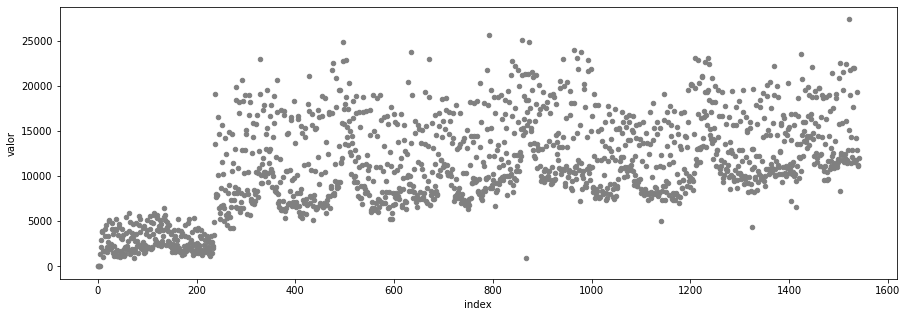

In [5]:
df.plot(kind='scatter', x='index', y='valor', color='gray')

In [6]:
df.tail(31)

,index,dia,mes,ano,valor
1511,1511,1,10,2018,11574.30
1512,1512,2,10,2018,11745.41
1513,1513,3,10,2018,12396.01
1514,1514,4,10,2018,12038.50
1515,1515,5,10,2018,16057.87
1516,1516,6,10,2018,22377.21
1517,1517,7,10,2018,11441.12
1518,1518,8,10,2018,11824.10
1519,1519,9,10,2018,11556.20
1520,1520,10,10,2018,12886.30


In [7]:
df_index = []
for i in range(1511,1542):
    df_index.append([i])

In [8]:
df_index

[[1511],
 [1512],
 [1513],
 [1514],
 [1515],
 [1516],
 [1517],
 [1518],
 [1519],
 [1520],
 [1521],
 [1522],
 [1523],
 [1524],
 [1525],
 [1526],
 [1527],
 [1528],
 [1529],
 [1530],
 [1531],
 [1532],
 [1533],
 [1534],
 [1535],
 [1536],
 [1537],
 [1538],
 [1539],
 [1540],
 [1541]]

In [9]:
# Dropando dias do ultimo mes da df

In [10]:
proximas_faturas_dias = []
for i in range(1511,1542):
    valor = [df['valor'].values[i]]
    proximas_faturas_dias.append(valor)

df = df.drop(df.index[1511:1542])

target_df = proximas_faturas_dias

In [11]:
target_df

[[11574.3],
 [11745.41],
 [12396.01],
 [12038.5],
 [16057.87],
 [22377.21],
 [11441.12],
 [11824.1],
 [11556.2],
 [12886.3],
 [15108.1],
 [27351.5],
 [21690.79],
 [19021.3],
 [14308.51],
 [11457.8],
 [12105.7],
 [12937.21],
 [17693.2],
 [21980.21],
 [21986.7],
 [11776.42],
 [11584.4],
 [11568.62],
 [11768.9],
 [14266.5],
 [19315.5],
 [12903.71],
 [11071.9],
 [11205.8],
 [12025.8]]

In [12]:
# Test

In [13]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                 ('linear', LinearRegression(fit_intercept=False))])

In [14]:
X = pd.DataFrame(df['index'])
y = pd.DataFrame(df['valor'])

In [15]:
model.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [16]:
pred_df = (model.predict(df_index))

In [17]:
pred_df

array([[12321.79800401],
       [12314.5201398 ],
       [12307.22405933],
       [12299.90976261],
       [12292.57724962],
       [12285.22652036],
       [12277.85757485],
       [12270.47041308],
       [12263.06503504],
       [12255.64144075],
       [12248.19963019],
       [12240.73960337],
       [12233.26136029],
       [12225.76490095],
       [12218.25022535],
       [12210.71733348],
       [12203.16622536],
       [12195.59690097],
       [12188.00936032],
       [12180.40360341],
       [12172.77963024],
       [12165.13744081],
       [12157.47703512],
       [12149.79841317],
       [12142.10157495],
       [12134.38652048],
       [12126.65324974],
       [12118.90176274],
       [12111.13205948],
       [12103.34413996],
       [12095.53800418]])

In [18]:
y_test = pred_df
y_pred = target_df
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  3070.90539154178
MSE 25121281.546312995
RMSE 5012.113480989132


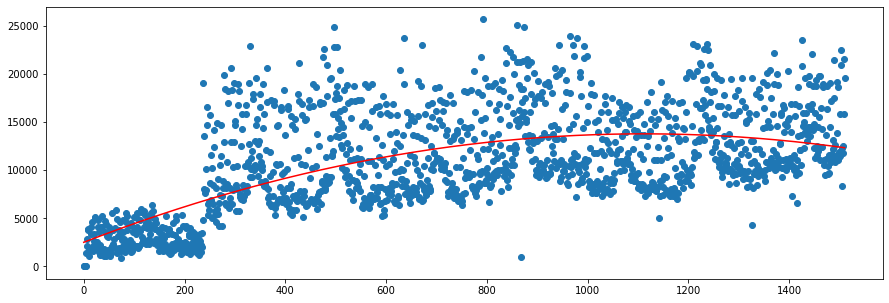

In [19]:
Y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [20]:
df.corr()

,index,dia,mes,ano,valor
index,1.000000,0.008071,-0.069376,0.973667,0.537839
dia,0.008071,1.000000,0.010783,-0.013934,-0.023945
mes,-0.069376,0.010783,1.000000,-0.294155,0.005461
ano,0.973667,-0.013934,-0.294155,1.000000,0.514937
valor,0.537839,-0.023945,0.005461,0.514937,1.000000


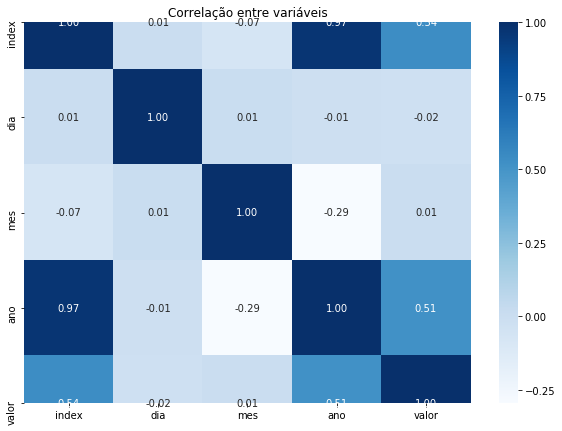

In [21]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis')
plt.show()